In [116]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 15)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="white")
sns.set(style="whitegrid", color_codes= True)

In [47]:
data = pd.read_csv("./data/heart_attack/heart.csv", header = 0)
print(data.shape)
print(list(data.columns))

(303, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

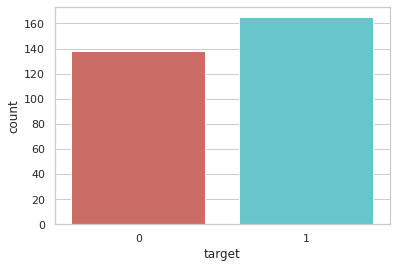

<Figure size 432x288 with 0 Axes>

In [58]:
sns.countplot(x='target', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [59]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Text(0, 0.5, 'count')

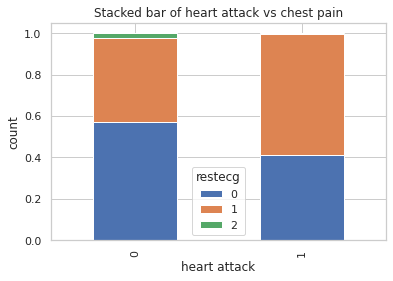

In [67]:
table = pd.crosstab(data["target"], data["restecg"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True)
plt.title("Stacked bar of heart attack vs resting ecg")
plt.xlabel("heart attack")
plt.ylabel("count")

Text(0, 0.5, 'count')

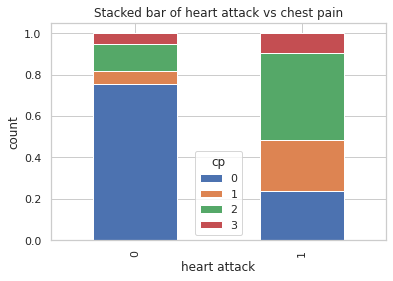

In [61]:
table = pd.crosstab(data["target"], data["cp"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True)
plt.title("Stacked bar of heart attack vs chest pain")
plt.xlabel("heart attack")
plt.ylabel("count")

Text(0, 0.5, 'count')

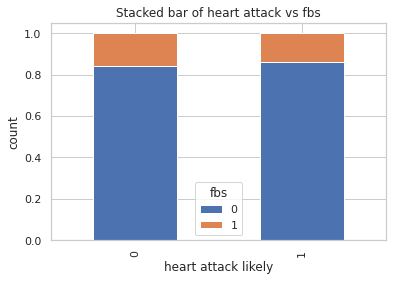

In [65]:
table = pd.crosstab(data["target"], data["fbs"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True)
plt.ylabel("heart attack likely")
plt.title("Stacked bar of heart attack vs fbs")
plt.xlabel("heart attack likely")
plt.ylabel("count")

Text(0, 0.5, 'count')

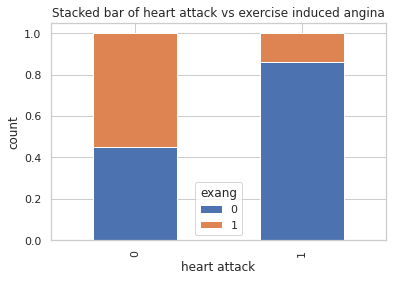

In [69]:
table = pd.crosstab(data["target"], data["exang"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True)
plt.title("Stacked bar of heart attack vs exercise induced angina")
plt.xlabel("heart attack")
plt.ylabel("count")

In [73]:
data.groupby('cp').mean()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
0,55.692308,0.727273,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.383217,1.258741,0.965035,2.447552,0.272727
1,51.360000,0.640000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.316000,1.680000,0.420000,2.140000,0.820000
2,53.517241,0.597701,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.797701,1.505747,0.586207,2.206897,0.793103
3,55.869565,0.826087,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,1.391304,1.260870,0.478261,2.260870,0.695652


Text(0, 0.5, 'counts')

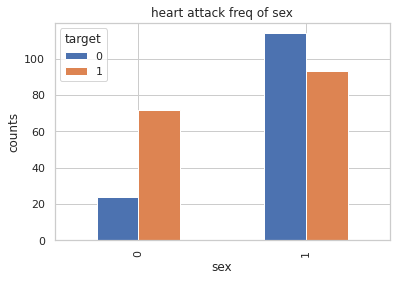

In [75]:
%matplotlib inline
pd.crosstab(data.sex, data.target).plot(kind='bar')
plt.title('heart attack freq of sex')
plt.xlabel('heart attack')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

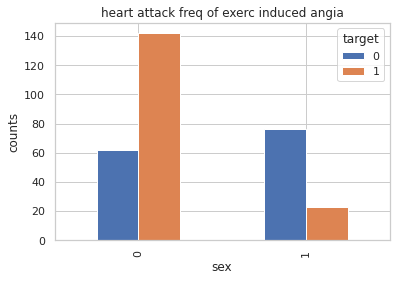

In [76]:
%matplotlib inline
pd.crosstab(data.exang, data.target).plot(kind='bar')
plt.title('heart attack freq of exerc induced angia')
plt.xlabel('heart attack')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

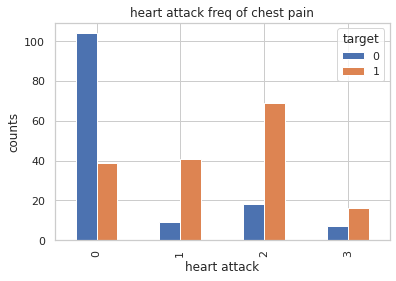

In [78]:
%matplotlib inline
pd.crosstab(data.cp, data.target).plot(kind='bar')
plt.title('heart attack freq of chest pain')
plt.xlabel('heart attack')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

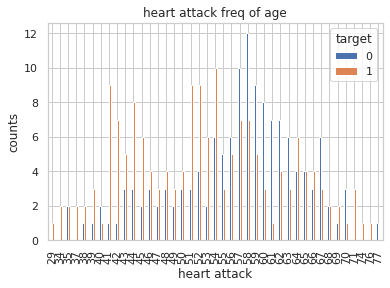

In [81]:
%matplotlib inline
pd.crosstab(data.age, data.target).plot(kind='bar')
plt.title('heart attack freq of age')
plt.xlabel('heart attack')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

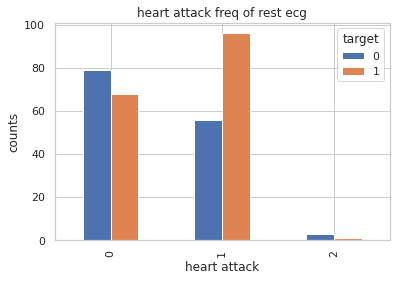

In [82]:
%matplotlib inline
pd.crosstab(data.restecg, data.target).plot(kind='bar')
plt.title('heart attack freq of rest ecg')
plt.xlabel('heart attack')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

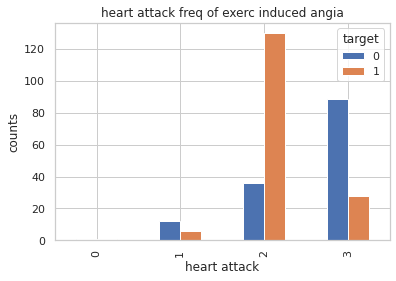

In [83]:
%matplotlib inline
pd.crosstab(data.thal, data.target).plot(kind='bar')
plt.title('heart attack freq of exerc induced angia')
plt.xlabel('heart attack')
plt.ylabel('counts')

Text(0, 0.5, 'Frequency')

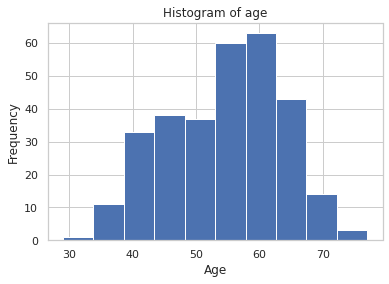

In [84]:
data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [85]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0, 0.5, 'Frequency')

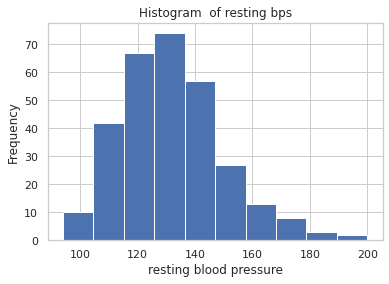

In [87]:
data.trestbps.hist()
plt.title("Histogram  of resting bps")
plt.xlabel("resting blood pressure")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

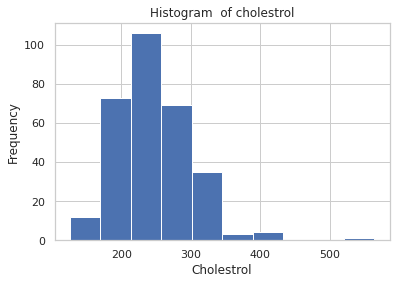

In [88]:
data.chol.hist()
plt.title("Histogram  of cholestrol")
plt.xlabel("Cholestrol")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

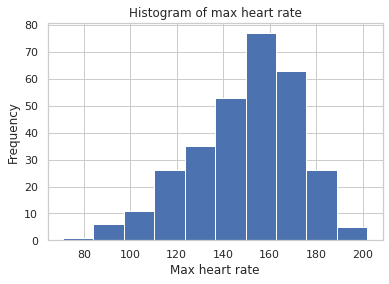

In [89]:
data.thalach.hist()
plt.title("Histogram of max heart rate")
plt.xlabel("Max heart rate")
plt.ylabel("Frequency")

In [103]:
x = data.loc[:,data.columns[:13]]
y = data['target']

In [107]:
logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.489     
Dependent Variable: target           AIC:              239.2711  
Date:               2020-12-23 05:33 BIC:              287.5496  
No. Observations:   303              Log-Likelihood:   -106.64   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      4.0884e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0128    0.0191   0.6701  0.5028  -0.0246   0.0501
sex           -1.6381    0.4519  -3.6250  0.0003  -2.5237  -0.

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/rajiv/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [117]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print(classification_report(y_test, y_pred))

[[31  8]
 [13 39]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.75        39
           1       0.83      0.75      0.79        52

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



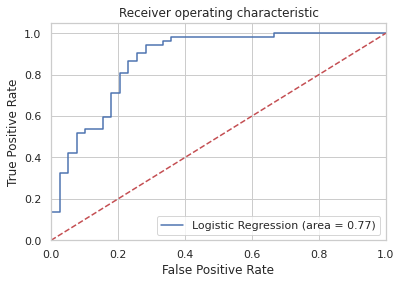

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()